In [28]:
import numpy as np
import scipy.linalg as la
from qiskit import quantum_info as qi
from qiskit import QuantumCircuit

In [12]:
def b_mat(i, j, n):
    basis_matrix = np.zeros((n, n), dtype=np.float32)
    basis_matrix[i, j] = 1.0

    return basis_matrix

def generate_gell_mann(order):
    lst_of_gm_matrices = []
    for k in range(order):
        j = 0
        while j < k:
            sym_mat = b_mat(j, k, order) + b_mat(k, j, order)
            anti_sym_mat = complex(0.0, -1.0) * (b_mat(j, k, order) - b_mat(k, j, order))

            lst_of_gm_matrices.append(sym_mat), lst_of_gm_matrices.append(anti_sym_mat)
            j += 1

        if k < (order - 1):
            n = k + 1
            coeff = np.sqrt(2 / (n*(n+1)))

            sum_diag = b_mat(0, 0, order)
            for i in range(1, k+1):
                sum_diag += b_mat(i, i, order)
            
            diag_mat = coeff * (sum_diag - n*(b_mat(k+1, k+1, order)))
            lst_of_gm_matrices.append(diag_mat)

    return lst_of_gm_matrices

In [24]:
i_hat = np.array([[1.0, 0.0],
                  [0.0, 0.0]])
j_hat = np.array([[0.0, 0.0],
                 [0.0, 1.0]])
X = np.array([[0.0, 1.0],
              [1.0, 0.0]])
identity = i_hat + j_hat

a = np.kron(i_hat, identity) 
b = np.kron(j_hat, X)

print(a)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [25]:
num_control_qubits = 4

divisors = range(num_control_qubits-1, -1, -1)
divisors = [2**i for i in divisors]
print(divisors)

params = [1.0, 1,2, 1.3, 1.4]
circ = QuantumCircuit(4, 4)
for iterarion_num, theta in zip(range(1, 2**num_control_qubits + 1), params):
    circ.rz(theta, 3)


[8, 4, 2, 1]


In [1]:
import numpy as np
import scipy.linalg as la
from qiskit import quantum_info as qi
from qiskit import QuantumCircuit


# Helper Functions ################################################
def b_mat(i, j, n):
    basis_matrix = np.zeros((n, n), dtype=np.float32)
    basis_matrix[i, j] = 1.0

    return basis_matrix


def generate_gell_mann(order):

    lst_of_gm_matricies = []
    for k in range(order):
        j = 0
        while j < k:
            sym_mat = b_mat(j, k, order) + b_mat(k, j, order)
            anti_sym_mat = complex(0.0, -1.0) * (b_mat(j, k, order) - b_mat(k, j, order))

            lst_of_gm_matricies.append(sym_mat), lst_of_gm_matricies.append(anti_sym_mat)
            j += 1

        if k < (order - 1):
            n = k + 1
            coeff = np.sqrt(2 / (n*(n+1)))

            sum_diag = b_mat(0, 0, order)
            for i in range(1, k+1):
                sum_diag += b_mat(i, i, order)

            diag_mat = coeff * (sum_diag - n*(b_mat(k+1, k+1, order)))
            lst_of_gm_matricies.append(diag_mat)

    return lst_of_gm_matricies


def get_conv_op(mats, parms):
    '''
    eの肩にgell mann行列とパラメータの1次結合が乗った行列をつくる
    '''
   
    final = np.zeros(mats[0].shape, dtype=np.complex128)
    for mat, parm in zip(mats, parms):  # sum over the gm matricies scaled by the parameters
        final += parm * mat

    return la.expm(complex(0, -1) * final)  # get the matrix exponential of the final matrix


def controlled_pool(mat):

    i_hat = np.array([[1.0, 0.0],
                      [0.0, 0.0]])
    j_hat = np.array([[0.0, 0.0],
                      [0.0, 1.0]])
    identity = i_hat + j_hat

    return np.kron(i_hat, identity) + np.kron(j_hat, mat)

def generate_uniformly_controlled_rotation(circ, params, control_qubit_indicies, target_qubit_index, axis='z', label=""):

    num_control_qubits = len(control_qubit_indicies)

    divisors = range(num_control_qubits - 1, -1, -1)
    divisors = [2**i for i in divisors]

    for iteration_num, theta in zip(range(1, 2**num_control_qubits+1), params):
        if axis == 'z':
            circ.rz(theta, target_qubit_index)
        elif axis == 'y':
            circ.ry(theta, target_qubit_index)
        else:
            circ.rx(theta, target_qubit_index)

        for divisor in divisors:
            if iteration_num % divisor == 0:
                control_element = int((num_control_qubits - 1) - np.log2(divisor))
                circ.cx(control_qubit_indicies[control_element], target_qubit_index)
                break

    print("--generate_uniformly_controlled_rotation------------------------")
    circ.draw(output='mpl')

    return


# Layer Implement ############################################################
    

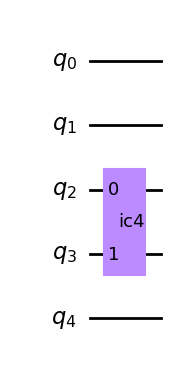

In [14]:
param = [np.random.rand() for _ in range(15)]

conv_operators = generate_gell_mann(4)  #2 qubit gell mann matrices
conv = get_conv_op(conv_operators, param)
u_conv = qi.Operator(conv)

circ = QuantumCircuit(5)
circ.unitary(u_conv, [2,3], label='ic4')
circ.draw(output='mpl')